In [89]:
from typing import List, Union
import numpy as np
import time
import matplotlib.pyplot as plt 
plt.style.use(["science", "notebook", "grid"])

# Linear Search
---

Linear search, also known as sequential search, is a simple algorithm used to find a particular element in a list. It works on any list, whether it is ordered or unordered. The algorithm involves checking each element of the list in sequence until the desired element is found or the end of the list is reached. 

<img src = "../Array_searching/images/linear_search_gif.gif" height = 300>

### Algorithm:
1. **Start from the first element:** Begin with the first element of the list.

2. **Compare the target element with the current element:** Check if the current element is the same as the element you are searching for.

3. **Element found:** If the current element is the same as the target element, return the index of this element.

4. **Move to the next element:** If the current element is not the target, move to the next element in the list.

5. **Repeat the process:** Continue steps 2-4 until you either find the target element or reach the end of the list.

6. **Element not found:** If you reach the end of the list without finding the target element, return an indication that the element is not in the list (often done by returning -1 or a similar value).

<img src = "../Array_searching/images/linear_search.jpg">


### Example Steps:
Suppose you have a list `[3, 5, 7, 9, 11]` and you want to search for the element `9`.

1. Compare `3` with `9` - not a match.
2. Move to the next element, `5`, and compare with `9` - not a match.
3. Move to `7`, compare with `9` - not a match.
4. Move to `9`, compare with `9` - it's a match! Return the index of `9`, which is `3`.

### Characteristics:
- **Time Complexity:** O(n), where n is the number of elements in the list.
- **Space Complexity:** O(1), as it requires no additional space besides the input list.
- **Best for small lists:** More efficient for smaller lists or when elements are expected to be found early in the list.
- **Simplicity:** Very simple to understand and implement.

Linear search is often used for its simplicity, especially in cases where the list is either too small for more complex algorithms to be beneficial or when the list is unordered and other search methods like binary search are not applicable.

In [90]:
def linear_search(arr: List[Union[int, float]], target: Union[int, float]) -> Union[int, None]:
    """ Return the index of the target in an unsorted array with linear search
    If the target is not in the array, return None
    Args:
        arr (list[int, float]): an unsorted array of integers
        target (int or float): the target integer
    Returns:
        the index of the target in the array if present else None
    """
    for idx, val in enumerate(arr):
        if val == target: # If the value is the target, return the index
            return idx
    return None

# Binary Search
---

Binary search is an efficient algorithm used to find the position of a target element within a sorted array. It's significantly faster than linear search, especially for large arrays, because it uses a divide and conquer approach, reducing the number of comparisons.

<img src = "../Array_searching/images/binary_search_gif.gif">

### Algorithm:
1. **Start with the Middle Element:** Begin by comparing the middle element of the sorted array with the target value.

2. **Check If Middle Element is the Target:** If the middle element is the target, the search is complete, and the position of the middle element is returned.

3. **Divide the Array:**
   - If the target is less than the middle element, ignore the right half of the array. Continue the search on the left half.
   - If the target is greater than the middle element, ignore the left half of the array. Continue the search on the right half.

4. **Repeat the Process:** Repeat steps 1-3 on the new sub-array until the target is found or the sub-array size becomes zero (meaning the target is not in the array).

5. **Return the Result:** If the target is found, return its index. If the target is not found, return an indication that the target is not present in the array (often done by returning -1 or a similar value).

<img src = "../Array_searching/images/binary_search_flowchart.png">

### Example Steps:
Let's consider a sorted array `[10, 20, 30, 40, 50, 60, 70]` and the target value `40`.

1. **First Iteration:**
   - Middle element is `40` (array's middle).
   - Since `40` is the target, the search ends.

2. **If the Target was `30`:**
   - First iteration: Middle element is `40`. `30` is less than `40`, so consider the left half `[10, 20, 30]`.
   - Second iteration: Middle element of `[10, 20, 30]` is `20`. `30` is greater than `20`, so consider the right half `[30]`.
   - Third iteration: Middle element is `30`, which matches the target.

### Characteristics:
- **Time Complexity:** O(log n), where n is the number of elements in the array. This is because the algorithm divides the search area by half with each step.
- **Space Complexity:** O(1) for iterative implementation and O(log n) for recursive implementation due to the call stack.
- **Precondition:** The array must be sorted. Binary search won't work correctly on an unsorted array.
- **Efficient for Large Arrays:** Particularly useful when dealing with large datasets, as the number of comparisons is significantly fewer than in linear search.
- **Not Suitable for Unsorted Arrays:** Requires the array to be sorted beforehand, which can be expensive if the dataset is dynamic and frequently modified.

Binary search is widely used due to its efficiency and speed, especially in cases where data is static and sorted, like in database indexing and in certain algorithmic problems.

In [91]:
def binary_search(arr: List[Union[int, float]], target: Union[int, float]) -> Union[int, None]:
    """Return the index of the target in a sorted array with binary search
    If the target is not in the array, return None
    Args:
        arr (list(int, float)): a sorted array of integers
        target (int or float): the target integer
    Returns:
        the index of the target in the array if present, else None
    """
    low_idx, high_idx = 0, len(arr) - 1  # Use 2 pointers to track the range of the target
    while low_idx <= high_idx:
        mid_idx : int = (low_idx + high_idx) // 2 # Find the middle index
        mid_val : Union[int, float] = arr[mid_idx] # Find the middle value
        if mid_val == target: return mid_idx # If the middle value is the target, return the index
        # If the middle value is less than the target, move the low pointer to the middle index + 1
        elif mid_val < target: low_idx = mid_idx + 1 
        # If the middle value is greater than the target, move the high pointer to the middle index - 1
        else: high_idx = mid_idx - 1
    return None # If the target is not in the array, return None

# Interpolation Search
---

Interpolation search is an algorithm used for finding the position of a target value within an array that is sorted and uniformly distributed. It's an improvement over binary search for certain kinds of lists, as it takes into account the distribution of values to guess where the target value might be.

### Algorithm:
1. **Calculate the Position:**
   - Initially, determine the position of the target value using the interpolation formula. This position is a guess based on the values at the ends of the array and the target value.

2. **Check Position:**
   - If the calculated position is outside the bounds of the array, the target is not in the array.
   - If the target value is found at the calculated position, return the position.

3. **Adjust the Range:**
   - If the target value is less than the value at the calculated position, narrow the search to the lower part of the array.
   - If the target value is greater than the value at the calculated position, narrow the search to the upper part of the array.

4. **Repeat the Process:**
   - Recalculate the position within the new range and repeat the process until the target value is found or the sub-array size becomes zero (indicating that the target is not present).

5. **Return the Result:**
   - If the target is found, return its index. If the target is not found, return an indication that the target is not present in the array.

>> VISUALIZE:
[Interpolation search](https://gbhat.com/algorithms/interpolation_search.html)


### Linear Interpolation formula:
The interpolation formula for determining a value $y$ based on a known set of values $x$ and their corresponding $y$ values is rooted in the concept of linear interpolation. The formula is typically used when you have two known points, \((x_1, y_1)\) and \((x_2, y_2)\), and you want to find a value $y$ at a given point $x$ that lies between $x_1$ and $x_2$.

The linear interpolation formula is as follows:

$$
y = y_1 + \frac{(y_2 - y_1)}{(x_2 - x_1)} \times (x - x_1)
$$

Here:
- $x$ is the point at which you want to estimate the value of $y$.
- $x_1$ and $x_2$ are the x-values of the two known points.
- $y_1$ and $y_2$ are the y-values of the two known points.

This formula essentially creates a straight line between the two known points and then estimates the value of $y$ at the given $x$ based on where it falls on that line. It assumes that the change between $x_1$ and $x_2$ is linear and that the rate of change between $y_1$ and $y_2$ is constant.

**In our problem, we need to search for x, based on y**
### Interpolation Formula:
The key to interpolation search is the formula used to guess the position of the target. The formula used is similar to the formula for linear interpolation:

$$
\text{Position} = \text{low} + \left( \frac{\text{target} - \text{array[low]}}{\text{array[high]} - \text{array[low]}} \right) \times (\text{high} - \text{low})$$

Where:
- `Position` is the guessed position of the target.
- `low` and `high` are the current bounds of the search.
- `target` is the value you are searching for.
- `array[low]` and `array[high]` are the values at the ends of the current search bounds.

### Characteristics:
- **Time Complexity:** O(log log n) under the assumption of a uniformly distributed array. However, in the worst case, it can be as bad as O(n).
- **Space Complexity:** O(1).
- **Suitability:** Best used for uniformly distributed, sorted arrays. It's less effective for non-uniformly distributed data.
- **Comparison to Binary Search:** More efficient than binary search when the elements are uniformly distributed, as it can target the likely position of the target value more quickly.

Interpolation search's efficiency comes from its ability to make an educated guess about where the target value might be, based on the values at the bounds of the search range and the target value itself. However, its performance degrades if the elements are not uniformly distributed.

In [92]:
def interpolation_search(arr: List[Union[int, float]], target: Union[int, float]) -> Union[int, None]:
    """ Return the index of the target in a sorted array with interpolation search
    If the target is not in the array, return None
    Args:
        arr (List[int, float]): a sorted array of integers
        target (int or float): the target integer
    Returns:
        the index of the target in the array
    Calculate the middle index by the linear interpolation formula:
    y = y1 + (y2 - y1) * (x - x1) / (x2 - x1), where y is the element in the array and x is the index
    We need to modify the formula to find x, the index of the target.
    y2, y1 are tarken as the values of the high and low pointers, x2, x1 are taken as the indices of the high and low pointers
    It is  sort of normalizing the formula to find the index of the target
    """
    low_idx, high_idx = 0, len(arr) - 1 # Use 2 pointers to track the range of the target
    while low_idx <= high_idx and target >= arr[low_idx] and target <= arr[high_idx]:
        if low_idx == high_idx:
            if arr[low_idx] == target:
                return low_idx
            else:
                return None
            
        # Safe division by checking for zero
        denom = arr[high_idx] - arr[low_idx]
        if denom == 0:
            break  # Avoid division by zero
            
        mod_min_idx = low_idx + int(((target - arr[low_idx]) / denom) * (high_idx - low_idx))
        # Ensure the index is within the range
        mod_min_idx = max(min(mod_min_idx, high_idx), low_idx)

        if arr[mod_min_idx] == target: return mod_min_idx # If the middle value is the target, return the index
        # If the middle value is less than the target, move the low pointer to the middle index + 1
        elif arr[mod_min_idx] < target: low_idx = mod_min_idx + 1 
        # If the middle value is greater than the target, move the high pointer to the middle index - 1
        else: high_idx = mod_min_idx - 1 
    return None # If the target is not in the array, return None

### Combining everything together:
We implement all the algorithms in a consolidated function to be able to handle any kind of array.

In [86]:
def search_array(arr: List[Union[int, float]], target: Union[int, float], sorted: bool = False, 
                 method_if_sorted: str = "interpolation") -> Union[int, None]:
    """
    Return the index of the target in an array.
    Args:
        arr (List[Union[int, float]]): An array of integers or floats.
        target (Union[int, float]): The target integer or float.
        sorted (bool): Whether the array is sorted.
        method_if_sorted (str): The method to use if the array is sorted ("binary", "interpolation").
    Returns:
        Union[int, None]: The index of the target in the array, or None if not found.
    """
    if sorted:
        if method_if_sorted == "interpolation":
            return interpolation_search(arr=arr, target=target)
        elif method_if_sorted == "binary":
            return binary_search(arr=arr, target=target)
    return linear_search(arr=arr, target=target)

In [87]:
LENGTH = 20000
binary_time = np.zeros(LENGTH - 1)
linear_time = np.zeros(LENGTH - 1)
interpolation_time = np.zeros(LENGTH - 1)

def is_sorted_ascending(arr):
    return np.all(arr[:-1] <= arr[1:])


for idx, length in enumerate(range(2, LENGTH)):
    
    # Generate a random array
    random_array = np.random.randint(low = 0, high = 1000000, size=length)
    # Set the target to be the last element
    target = random_array[np.random.randint(low = 0, high = len(random_array))]
    random_array = np.sort(random_array) # Sort the array

    t1 = time.perf_counter()
    idx = search_array(arr = random_array, target = target, sorted=True, method_if_sorted="binary")
    binary_time[idx] = time.perf_counter() - t1

    t1 = time.perf_counter()
    idx = search_array(arr = random_array, target = target, sorted=True, method_if_sorted="interpolation")
    interpolation_time[idx] = time.perf_counter() - t1
    
    t1 = time.perf_counter()
    idx = search_array(arr = random_array, target = target, sorted=False)
    linear_time[idx] = time.perf_counter() - t1

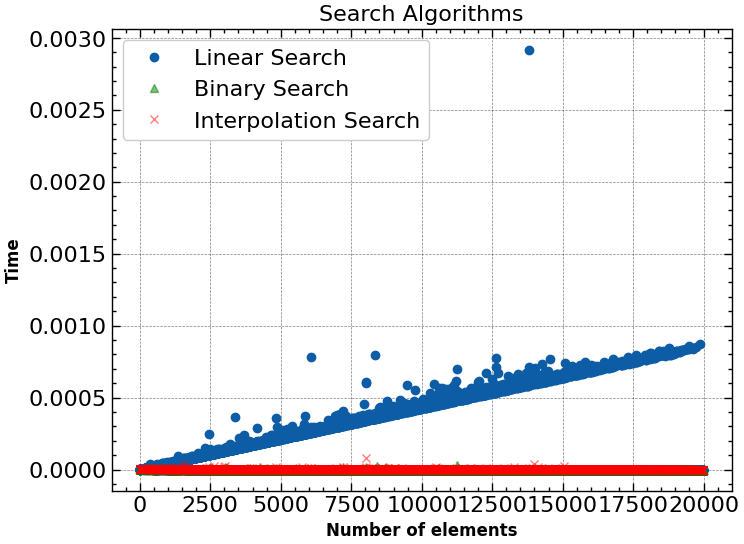

In [88]:
plt.plot(linear_time, "o", label = "Linear Search")
plt.plot(binary_time, "g^", label = "Binary Search", alpha = 0.5)
plt.plot(interpolation_time, "rx", label = "Interpolation Search", alpha = 0.5)
plt.title("Search Algorithms")
plt.xlabel(r"Number of elements", fontweight = "bold", fontsize = 12)
plt.ylabel(r"Time", fontweight = "bold", fontsize = 12)
plt.legend()